# Read and Parse Chainer logs

# CIFAR100 runs with same hyper-parameters
## 64 runs x 500 epochs on DL server 
b512 l0.15

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import subprocess
import os

In [2]:
!ls logs/series/cifar_e500*

logs/series/cifar_e500-acc.csv    logs/series/cifar_e500_run_37.log
logs/series/cifar_e500-loss.csv   logs/series/cifar_e500_run_38.log
logs/series/cifar_e500-time.csv   logs/series/cifar_e500_run_39.log
logs/series/cifar_e500_run_0.log  logs/series/cifar_e500_run_4.log
logs/series/cifar_e500_run_1.log  logs/series/cifar_e500_run_40.log
logs/series/cifar_e500_run_10.log logs/series/cifar_e500_run_41.log
logs/series/cifar_e500_run_11.log logs/series/cifar_e500_run_42.log
logs/series/cifar_e500_run_12.log logs/series/cifar_e500_run_43.log
logs/series/cifar_e500_run_13.log logs/series/cifar_e500_run_44.log
logs/series/cifar_e500_run_14.log logs/series/cifar_e500_run_45.log
logs/series/cifar_e500_run_15.log logs/series/cifar_e500_run_46.log
logs/series/cifar_e500_run_16.log logs/series/cifar_e500_run_47.log
logs/series/cifar_e500_run_17.log logs/series/cifar_e500_run_48.log
logs/series/cifar_e500_run_18.log logs/series/cifar_e500_run_49.log
logs/series/cifar_e500_run_19.log logs/series/cif

In [3]:
filename_pattern=re.compile(r"cifar_e500.*\.log")

In [4]:
logs_directory =  "logs/series/"
list_command = "ls -1 "+logs_directory
files=[]
proc = subprocess.Popen(list_command.split(" "),
                     stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
for line in iter(proc.stdout.readline,b''):
    line = line.strip(" \n")
    m = filename_pattern.match(line)
    if m:
        files.append(os.path.abspath(os.path.join(logs_directory,line)))
files

['/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_0.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_1.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_10.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_11.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_12.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_13.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_14.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_15.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_16.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_17.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_18.log',
 '/Users/peterbryzgalov

In [5]:
run_pattern = re.compile(r"cifar_.*run_(\d+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")
def fileToDF(logfile):
    remove_str="[J"
    global run_pattern
    global output_pattern
    m = run_pattern.search(logfile)
    if m:
        run = int(m.group(1))        
    else:
        print "No match in filename:",logfile
        return None
    with open(logfile,"r") as f:
        lines = f.readlines()
        batch = 0
        epoch = 0
        ind = 0
        loss = 0
        acc = 0
        learn = 0
        time = 0
        df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
        for line in lines:
            s = line.strip(' \n')
            s = s.replace(remove_str,"")
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                loss = float(m.group(3))
                acc = float(m.group(5))
                time = float(m.group(6))
                #print batch,learn,loss,acc,time
                df.loc[ind] = [run,epoch,loss,acc,time]
                ind += 1
                    
    return df

In [6]:
df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
for file in files:
#print files[2]
    df1 = fileToDF(file)
    #print df1.head()
    if len(df1) > 0:
        df = pd.concat([df,df1],ignore_index=True)
print df.shape
df.head()

(32000, 5)


,run,epoch,loss,acc,time
0,0.0,1.0,4.59246,0.014016,24.2174
1,0.0,2.0,4.58389,0.014809,47.7930
2,0.0,3.0,4.68257,0.013994,71.3496
3,0.0,4.0,4.57221,0.023150,95.2589
4,0.0,5.0,4.37727,0.023943,119.3030


In [7]:
df_loss = df.pivot(index="epoch",columns="run")["loss"]
df_acc = df.pivot(index="epoch",columns="run",values="acc")
df_time = df.pivot(index="epoch",columns="run",values="time")
df_acc.head()

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0
epoch,,,,,,,,,,,,,,,,,,,,,
1.0,0.014016,0.010599,0.010231,0.010024,0.009754,0.010024,0.014809,0.009938,0.011087,0.020341,...,0.010110,0.012736,0.010708,0.012724,0.010013,0.007031,0.011477,0.008473,0.015614,0.010110
2.0,0.014809,0.013982,0.009668,0.010415,0.012270,0.020473,0.012402,0.010817,0.016314,0.010501,...,0.010024,0.010110,0.014407,0.010512,0.018055,0.016849,0.010254,0.010696,0.016912,0.014482
3.0,0.013994,0.024288,0.012356,0.016108,0.022943,0.023874,0.011719,0.011391,0.011707,0.010438,...,0.010915,0.014832,0.027183,0.012759,0.023932,0.025775,0.010036,0.010512,0.022576,0.019985
4.0,0.023150,0.020060,0.024747,0.025333,0.026373,0.027912,0.017791,0.012356,0.011380,0.014798,...,0.011466,0.015309,0.030819,0.025006,0.021806,0.027057,0.019658,0.014602,0.034065,0.018181
5.0,0.023943,0.029739,0.030475,0.035932,0.052269,0.047019,0.018509,0.016544,0.015677,0.020927,...,0.019485,0.021622,0.032577,0.021013,0.039901,0.066544,0.026557,0.021915,0.050511,0.054711


In [70]:
df_time.tail()

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0
epoch,,,,,,,,,,,,,,,,,,,,,
496.0,11906.6,11921.2,11952.0,11847.2,12069.7,11879.2,11851.7,11793.1,11798.2,11849.7,...,12048.7,11784.9,11833.2,11862.8,11850.6,11929.7,11924.2,12052.0,11728.2,11786.2
497.0,11930.7,11945.4,11976.1,11871.2,12094.2,11903.2,11875.6,11817.0,11822.0,11873.7,...,12073.0,11808.7,11857.2,11886.8,11874.6,11953.8,11948.3,12076.3,11751.9,11810.0
498.0,11954.5,11969.2,12000.1,11894.9,12118.4,11927.0,11899.4,11840.6,11845.7,11897.4,...,12097.1,11832.3,11880.9,11910.5,11898.3,11977.7,11972.1,12100.4,11775.4,11833.6
499.0,11978.6,11993.4,12024.3,11918.9,12143.2,11951.0,11923.4,11864.5,11869.5,11921.4,...,12121.5,11856.1,11904.8,11934.5,11922.2,12001.8,11996.2,12124.7,11799.2,11857.5
500.0,12002.7,12017.5,12048.4,11942.9,12167.8,11975.0,11947.3,11888.3,11893.3,11945.3,...,12145.9,11880.0,11928.8,11958.5,11946.2,12025.9,12020.3,12149.1,11822.9,11881.3


In [8]:
def plot(df,**kwargs):
    ax = df.plot(**kwargs)
    ax.set_xlim(0,500)
    major = np.arange(0,501,100)
    ax.set_xticks(major)
    ax.xaxis.grid(which="major", linestyle=":",color="#cccccc")
    minor = np.arange(25,476,25)
    ax.set_xticks(minor, minor=True)
    ax.xaxis.grid(which="minor", linestyle=":",color="#cccccc",alpha=0.5)
    ax.yaxis.grid(linestyle="-",color="black",alpha=0.05)
    return ax

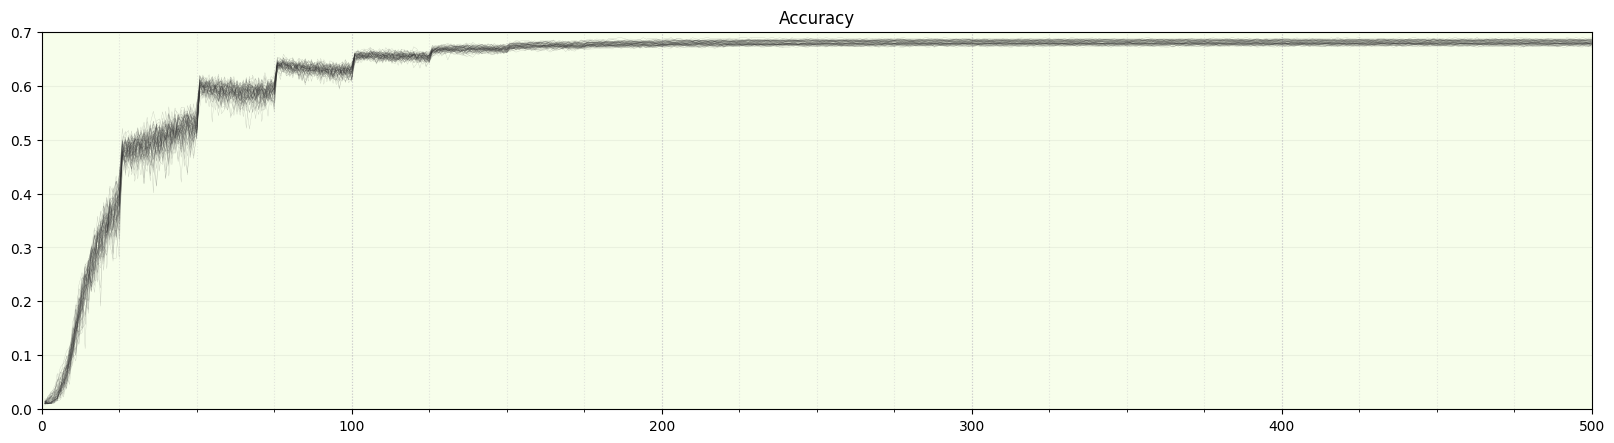

In [9]:
ax = plot(df_acc,legend=False,figsize=(20,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Accuracy")
ax.set_xlabel("")
ax.set_ylim(0,.7)
ax.set_facecolor("#F7FEEB")

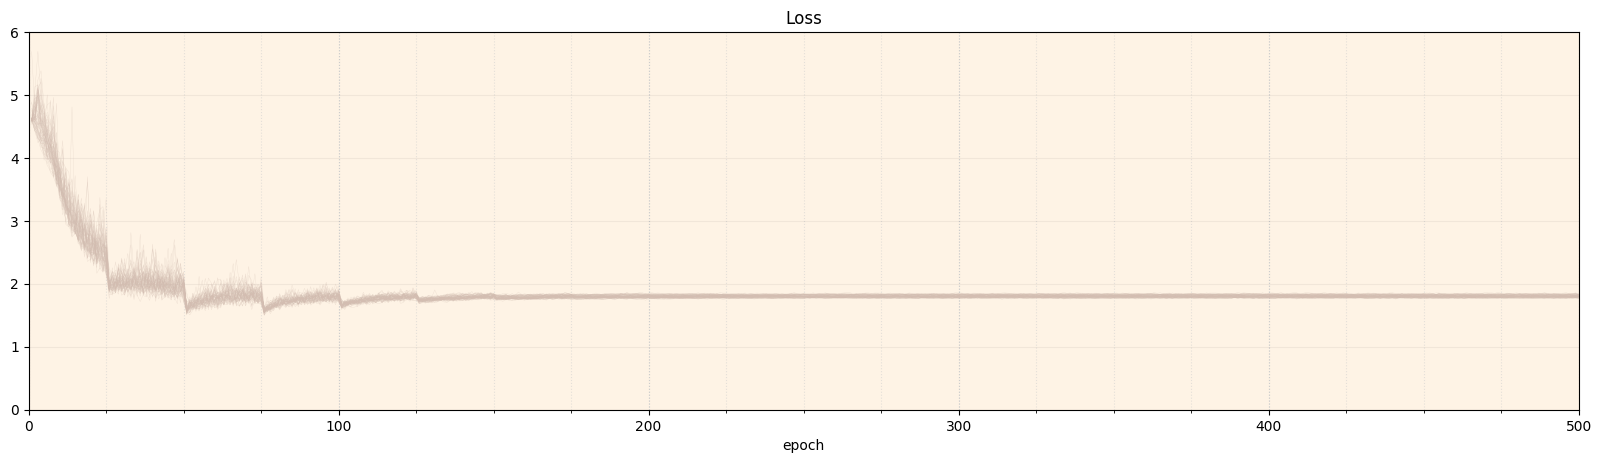

In [12]:
ax = plot(df_loss,legend=False,figsize=(20,5),linewidth=0.2,color="#D3BDB1",alpha=0.5)
ax.set_title("Loss")
ax.set_ylim(0,6)
ax.set_facecolor("#FEF3E5")

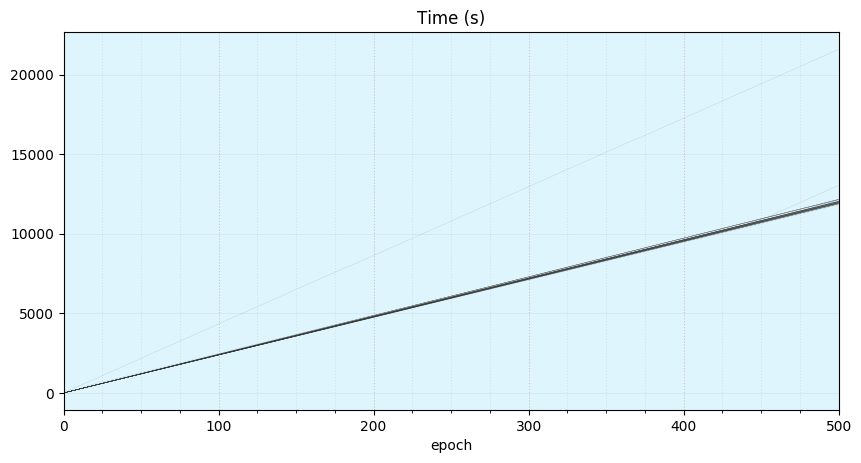

In [11]:
ax = plot(df_time,legend=False,figsize=(10,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Time (s)")
#ax.set_ylabel("s")
ax.set_facecolor("#00B7FA20")

In [139]:
# Save data to CSV files
logfile = os.path.join(logs_directory,"cifar_e500")
df_loss.to_csv(logfile+"-loss.csv")
df_acc.to_csv(logfile+"-acc.csv")
df_time.to_csv(logfile+"-time.csv")

In [13]:
def RelativePercentDifference(ser):
    mean = ser.mean()
    ser = ser.apply(lambda x: x/mean*100)
    return ser

In [16]:
slice_epoch = [20.,25.,40.,50.,200.,500.]
df_loss.iloc[-3:]

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0
epoch,,,,,,,,,,,,,,,,,,,,,
498.0,1.81939,1.79402,1.80293,1.80973,1.83211,1.79469,1.80163,1.80814,1.82611,1.78958,...,1.78854,1.78910,1.78775,1.80686,1.78932,1.81226,1.79071,1.78660,1.80727,1.80669
499.0,1.81122,1.79418,1.79870,1.80697,1.83592,1.79338,1.80714,1.80411,1.83864,1.78253,...,1.79650,1.78919,1.78365,1.80557,1.80159,1.81611,1.78737,1.77671,1.81166,1.82513
500.0,1.81856,1.79908,1.80410,1.81003,1.83988,1.80571,1.81240,1.80712,1.84095,1.77764,...,1.79210,1.79320,1.79716,1.80429,1.79522,1.82812,1.77283,1.78016,1.81302,1.82323


In [17]:
df_loss_p = df_loss.copy()
df_acc_p = df_acc.copy()
df_time_p = df_time.copy()
i = 0
index = []
for i in range(0,len(slice_epoch)):
    name = str(int(slice_epoch[i]))
    index.append(name)
    df_loss_p.loc[name] = RelativePercentDifference(df_loss_p.loc[slice_epoch[i]])
    df_acc_p.loc[name] = RelativePercentDifference(df_acc_p.loc[slice_epoch[i]])
    df_time_p.loc[name] = RelativePercentDifference(df_time_p.loc[slice_epoch[i]])
df_loss_p.iloc[-5:]

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0
epoch,,,,,,,,,,,,,,,,,,,,,
25,100.891049,102.240001,117.818263,98.932118,104.638816,87.971219,105.051437,96.499527,97.459867,87.183008,...,94.549142,99.216964,96.735136,106.310459,104.941161,95.674286,96.108881,88.845292,95.893618,99.711377
40,91.999272,95.411774,101.274644,96.723328,87.947479,104.691576,99.690444,100.021654,104.788527,94.599250,...,94.024430,103.905627,102.708741,108.854100,98.420721,98.697796,95.343859,96.921661,90.913118,105.246710
50,96.764255,101.091950,109.967721,99.163348,107.387197,103.419802,100.980734,105.233600,105.940362,99.964925,...,103.198908,95.636718,88.162681,100.360075,96.868809,95.768435,95.277443,101.563978,98.042473,108.124197
200,101.369512,99.151720,100.972726,100.787079,101.247595,99.737479,100.273362,100.657957,101.183865,98.417444,...,98.555432,99.563469,98.905668,99.949172,98.585357,100.364246,98.767125,99.406085,100.054465,100.492260
500,100.692027,99.613437,99.891390,100.219729,101.872496,99.980534,100.350954,100.058605,101.931741,98.426324,...,99.226961,99.287867,99.507129,99.901910,99.399712,101.221356,98.159998,98.565854,100.385282,100.950601


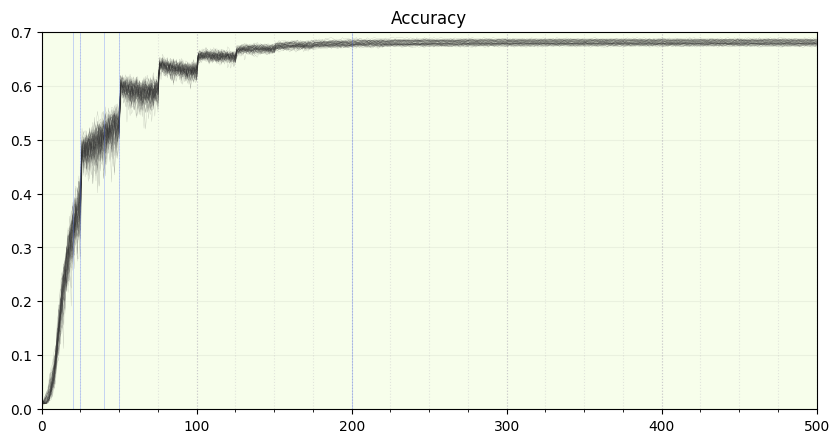

In [50]:
ax = plot(df_acc,legend=False,figsize=(10,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Accuracy")
ax.set_xlabel("")
ax.set_facecolor("#F7FEEB")
ax.set_ylim(0,0.7)
for sl in slice_epoch:
    xx = [sl,sl]
    yy = [0,0.7]
    ax.plot(xx,yy,lw=0.5,color="#5577FF70",linestyle="-")

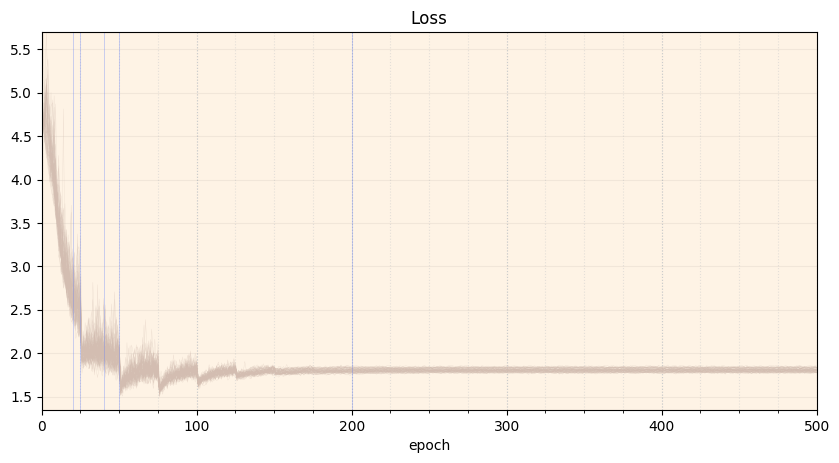

In [51]:
ax = plot(df_loss,legend=False,figsize=(10,5),linewidth=0.2,color="#D3BDB1",alpha=0.5)
ax.set_title("Loss")
ax.set_facecolor("#FEF3E5")
ymin = df_loss.min().min()*0.9 
ymax = df_loss.max().max()*1. 
ax.set_ylim(ymin,ymax)
for sl in slice_epoch:
    xx = [sl,sl]
    yy = [ymin,ymax]
    ax.plot(xx,yy,lw=0.5,color="#5577FF70")

In [20]:
def plotBox(df, **kwargs):
    boxcolor=(.3,.3,.3)
    meanlineprops = dict(linewidth=1, color=(.7,.7,.8), linestyle="--")
    medianprops = dict(linestyle='-', linewidth=1)
    color = dict(caps=boxcolor,whiskers=boxcolor,boxes=boxcolor, medians=boxcolor)
    (ax,lines) = df.plot.box(showmeans=True, meanline=True, patch_artist=False,
                    color=color, meanprops=meanlineprops, medianprops=medianprops,
                    return_type='both',**kwargs)
#    print lines.keys()
    ax.yaxis.grid(linestyle=":",color="#cccccc")
# #     plotText(ax, lines)
# #     ["medians"],"median")
# #     plotText(ax, lines["means"],"mean")
# #     plotText(ax, lines["boxes"],"quartile")
# #     plotText(ax, lines["caps"],"caps")
# #    box = ax.artists[0]
#     #box.set_facecolor("#eeeeee")
    
#     for median in lines["medians"]:
#         x,y = median.get_data()
#         padding = 0.01
#         ax.text(x[0]+padding, y[0]-0.0001, 'median', style='italic',
#             verticalalignment='top', horizontalalignment='left',
#             color=(.6,.6,.6), fontsize=6)
#     for mean in lines["means"]:
#         x,y = mean.get_data()
#         padding = 0.01
#         ax.text(x[0]+padding, y[0]+0.0007, 'mean', style='italic',
#             verticalalignment='top', horizontalalignment='left',
#             color=(.6,.6,.6), fontsize=6)
    return ax

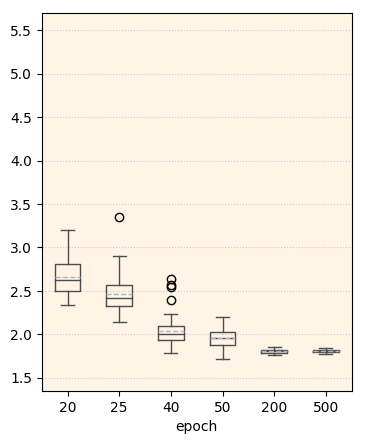

In [68]:
ax = plotBox(df_loss_p.loc[slice_epoch].T,figsize=(4,5))
#ax.set_title("Loss")
ax.set_xlabel("epoch")
ymin = df_loss.min().min()*0.9 
ymax = df_loss.max().max()*1
ax.set_ylim(ymin,ymax)
ax.set_xticklabels(df_loss_p.loc[slice_epoch].index.map(lambda x: str(int(x))))
ax.set_facecolor("#FFAC3620")

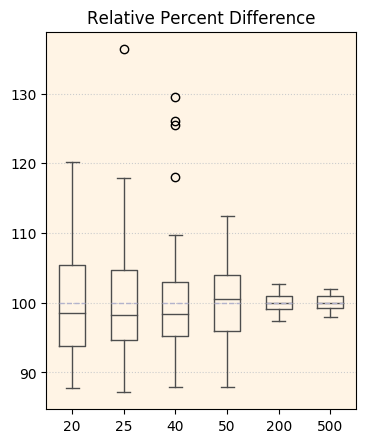

In [31]:
ax = plotBox(df_loss_p.loc[index].T,figsize=(4,5))
ax.set_title("Relative Percent Difference")
ax.set_facecolor("#FFAC3620")

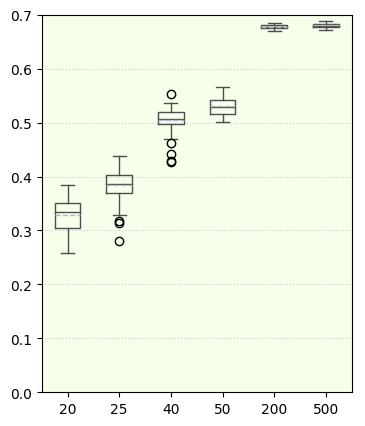

In [69]:
ax = plotBox(df_acc_p.loc[slice_epoch].T,figsize=(4,5))
#ax.set_title("Accuracy")
#ax.set_xlabel("epoch")
ax.set_xticklabels(df_loss_p.loc[slice_epoch].index.map(lambda x: str(int(x))))
ax.set_ylim(0,0.7)
ax.set_facecolor("#CBFF7725")

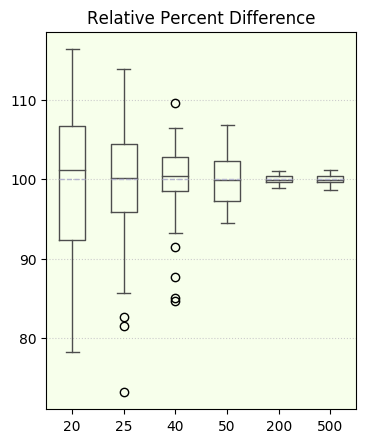

In [33]:
ax = plotBox(df_acc_p.loc[index].T,figsize=(4,5))
ax.set_title("Relative Percent Difference")
#ax.set_xlabel("epoch")
ax.set_facecolor("#CBFF7725")